# Analisis de dataframe titanic

## 1. importando librerias y cargando datos

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm


# creando el dataframe
datos = pd.read_csv("TitanicTrain.csv")
df=pd.DataFrame(datos)




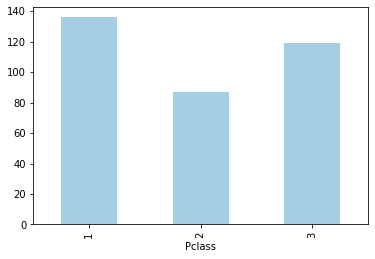

In [25]:
#Sovrevientes agrupados por clase
df.Survived.groupby(df.Pclass).sum().plot(kind='bar', cmap='Paired')


In [26]:
#mostrando la cantidad de datos
print(df.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [27]:
#Encontrando los datos nulos
print(pd.isnull(df).sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [28]:
# I. obtener los nombres de la columnas
col_names = df.columns.tolist()

# II. for para recorrer la lista
for column in col_names:
    print ("valores nulos en <{0}>: {1}".format(column, df[column].isnull().sum()))

valores nulos en <PassengerId>: 0
valores nulos en <Survived>: 0
valores nulos en <Pclass>: 0
valores nulos en <Name>: 0
valores nulos en <Sex>: 0
valores nulos en <Age>: 177
valores nulos en <SibSp>: 0
valores nulos en <Parch>: 0
valores nulos en <Ticket>: 0
valores nulos en <Fare>: 0
valores nulos en <Cabin>: 687
valores nulos en <Embarked>: 2


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
#remplazar string por enteros

df['Sex'].replace(['female','male'],[0,1],inplace=True)
df['Embarked'].replace(['Q','S','C'],[0,1,2])



0      1.0
1      2.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    2.0
890    0.0
Name: Embarked, Length: 891, dtype: float64

In [31]:
#remplazo los datos nulos de edad por el valor promedio
promedio = df["Age"].mean()
print(promedio)
df['Age'] = df['Age'].replace(np.nan, promedio)

29.69911764705882


In [32]:
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [33]:
#eliminar una columna de datos
df.drop(['Cabin'], axis = 1, inplace=True)

In [34]:
pclass_gender_survival_count_df = df.groupby(["Pclass", "Sex"])["Survived"].sum()
pclass_gender_survival_count_df

Pclass  Sex
1       0      91
        1      45
2       0      70
        1      17
3       0      72
        1      47
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sobreviventes por sexo')

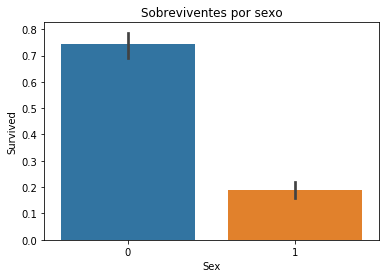

In [35]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Sobreviventes por sexo')

Text(0.5, 1.0, 'Sobrevivientes por Clase')

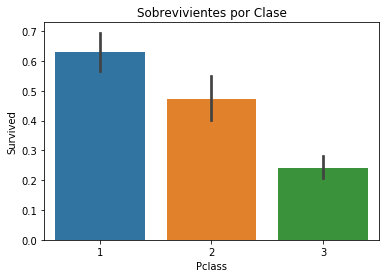

In [36]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Sobrevivientes por Clase')

Text(0.5, 1.0, 'Sobrevivientes por Embarque')

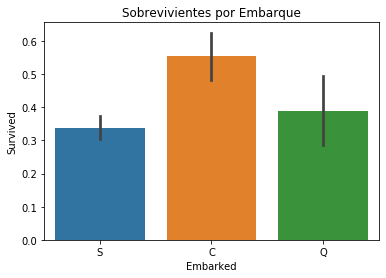

In [37]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Sobrevivientes por Embarque')

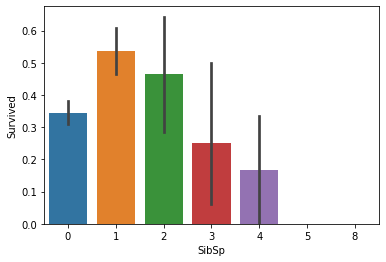

In [38]:
sns.barplot(x='SibSp', y='Survived', data=df)

Text(0.5, 1.0, 'Sexo de pasajeros')

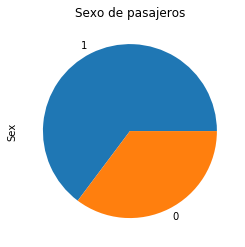

In [39]:
df.Sex.value_counts().plot(kind='pie')
plt.title('Sexo de pasajeros')

Text(0.5, 1.0, 'Pasajeros por Clase')

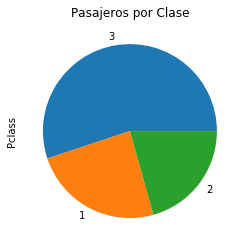

In [40]:
df.Pclass.value_counts().plot(kind='pie')
plt.title('Pasajeros por Clase')

Text(0.5, 1.0, 'Histograma')

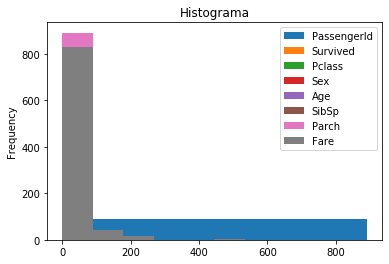

In [41]:
df.plot.hist()
plt.title('Histograma')

In [42]:
pd.crosstab(df.Survived, df.Sex)

Sex,0,1
Survived,,
0,81,468
1,233,109


Text(0.5, 1.0, 'Sobrevivientes mujeres vs hombres')

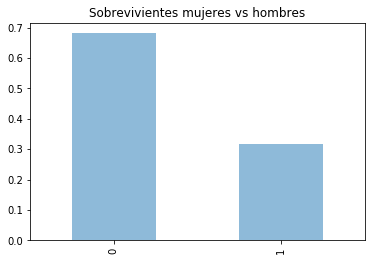

In [43]:
df.Sex[df.Survived == 1].value_counts(normalize = True).plot(kind="bar", alpha=0.5)
plt.title("Sobrevivientes mujeres vs hombres")


Text(0.5, 1.0, 'Distribucion por edad')

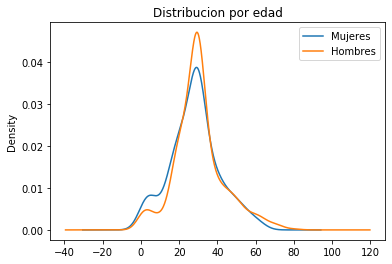

In [44]:
for t_sex in [0,1]:
    df.Age[df.Sex == t_sex].plot(kind="kde")
    
plt.legend({"Mujeres", "Hombres"})
plt.title('Distribucion por edad')